<a href="https://colab.research.google.com/github/BhagyaRekhaSunkavalli/AI-ML/blob/main/AI_ML_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [13]:
df = pd.read_csv("/content/Iris.csv")

X = df.iloc[:, 1:5]
y = df["Species"]

y = y.map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"K = {k}: Accuracy = {accuracy:.2f}")

knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(X_train_scaled, y_train)
y_pred_final = knn_final.predict(X_test_scaled)


K = 1: Accuracy = 1.00
K = 3: Accuracy = 1.00
K = 5: Accuracy = 1.00
K = 7: Accuracy = 1.00
K = 9: Accuracy = 1.00


In [20]:
conf_matrix = confusion_matrix(y_test, y_pred_final)
print("\nConfusion Matrix:\n", conf_matrix)



Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


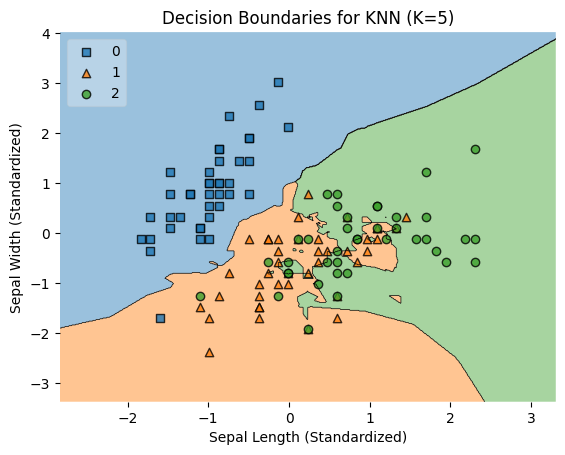

In [21]:
X_vis = X_train_scaled[:, :2]
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_train)

plot_decision_regions(X_vis, y_train.values, clf=knn_vis, legend=2)
plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.title("Decision Boundaries for KNN (K=5)")
plt.show()